# Part A

In [1]:
# import libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [2]:
# load the dataset
fb_df = pd.read_excel("Football_Players.xlsx")
fb_df

,Player,Comp,Att,Pct,Yds,Avg,Yds/G,TD,Int
0,1,107,166,45.3,1172,7.1,167.5,12,4
1,2,238,353,47.3,2829,8.0,188.7,20,4
2,3,207,347,41.9,2324,6.7,145.3,20,9
3,4,252,392,44.9,2975,7.6,198.4,22,11
4,5,66,119,38.9,760,6.4,152.0,4,4
5,6,220,366,42.1,2580,7.0,161.3,16,10
6,7,134,221,42.6,1285,5.8,116.8,7,9
7,8,67,120,39.1,761,6.3,126.9,4,4
8,9,38,78,34.4,380,4.9,95.2,0,2
9,10,86,156,38.4,1001,6.4,143.0,3,4


In [3]:
# a) perform k-means clustering
# use a features matrix with all the variables except the player number
features = ["Comp", "Att", "Pct", "Yds", "Avg", "Yds/G", "TD", "Int"]
# preprocessing: standardization / normalization
scaler = StandardScaler()
scaled_fb_df = scaler.fit_transform(
    fb_df[features])
scaled_fb_df[0:5]

array([[-0.82089713, -0.92950955,  0.72367284, -0.84933383,  0.19534086,
         0.41684333, -0.1134941 , -0.85739781],
       [ 0.96378583,  0.76071801,  1.33865174,  1.07902907,  1.24529795,
         1.1232839 ,  0.9710051 , -0.85739781],
       [ 0.54145627,  0.70648611, -0.32179128,  0.49132644, -0.27130674,
        -0.3229199 ,  0.9710051 ,  0.62921936],
       [ 1.1545153 ,  1.11322537,  0.60067706,  1.24893914,  0.77865035,
         1.44651378,  1.24212989,  1.22386623],
       [-1.37946203, -1.3543261 , -1.24425963, -1.32880607, -0.62129244,
        -0.09965803, -1.1979933 , -0.85739781]])

In [4]:
# Make an instance of KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=1)

# Fit only on a features matrix
kmeans.fit(scaled_fb_df)


KMeans(n_clusters=3, random_state=1)

In [5]:
# create cluster labels
labels = kmeans.labels_
fb_df["labels"] = kmeans.labels_
fb_df.head(3)

,Player,Comp,Att,Pct,Yds,Avg,Yds/G,TD,Int,labels
0,1,107,166,45.3,1172,7.1,167.5,12,4,0
1,2,238,353,47.3,2829,8.0,188.7,20,4,1
2,3,207,347,41.9,2324,6.7,145.3,20,9,2


In [6]:
# find the largest clusters
fb_df.groupby([fb_df.labels]).size()

labels
0    16
1    14
2    13
dtype: int64

In [7]:
# the values of the largest cluster centroids
centroids = kmeans.cluster_centers_
centroids[0]

array([-1.18192078, -1.19840939, -0.5581738 , -1.15831412, -0.43900822,
       -0.56909111, -1.02006765, -0.82023238])

In [8]:
# find the size of the largest cluster
kmeans.inertia_

128.46015016554452

In [9]:
# visually evaluate the clusters with selected columns
x = pd.DataFrame(scaled_fb_df, columns = features)
x

,Comp,Att,Pct,Yds,Avg,Yds/G,TD,Int
0,-0.820897,-0.929510,0.723673,-0.849334,0.195341,0.416843,-0.113494,-0.857398
1,0.963786,0.760718,1.338652,1.079029,1.245298,1.123284,0.971005,-0.857398
2,0.541456,0.706486,-0.321791,0.491326,-0.271307,-0.322920,0.971005,0.629219
3,1.154515,1.113225,0.600677,1.248939,0.778650,1.446514,1.242130,1.223866
4,-1.379462,-1.354326,-1.244260,-1.328806,-0.621292,-0.099658,-1.197993,-0.857398
5,0.718562,0.878220,-0.260293,0.789251,0.078679,0.210243,0.428755,0.926543
6,-0.453062,-0.432384,-0.106549,-0.717828,-1.321264,-1.272616,-0.791306,0.629219
7,-1.365838,-1.345287,-1.182762,-1.327642,-0.737954,-0.936057,-1.197993,-0.857398
8,-1.760921,-1.724911,-2.627962,-1.771038,-2.371221,-1.992386,-1.740243,-1.452045
9,-1.106991,-1.019896,-1.398004,-1.048338,-0.621292,-0.399562,-1.333556,-0.857398


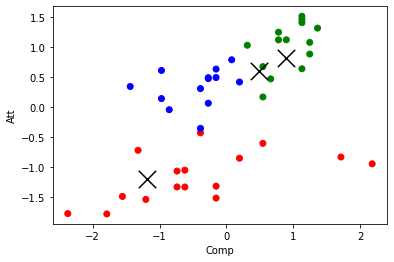

In [10]:
#render scatterplot
#here we can see the optimal number would be actually 2 rather
colormap = np.array(['r', 'g', 'b'])
plt.scatter(x["Avg"], x["Yds"], c=colormap[labels])
plt.scatter(centroids[:,0], centroids[:,1], s = 300, marker = 'x', c = 'k')

plt.xlabel('Comp')
plt.ylabel('Att');

C:\Users\minhyekim\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Fig : Elbow Diagram')

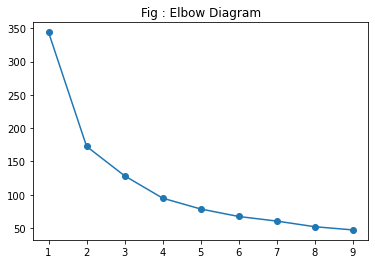

In [11]:
# b) find optimal number of clusters using elbow method
cluster_range = range(1, 10)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(scaled_fb_df)
    # represent assumptions errors follow standard normal distribution
    cluster_errors.append(clusters.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(cluster_range, cluster_errors, marker="o")
plt.title("Fig : Elbow Diagram")

# x = number of clusters, y = error term
# the graph looks like 'arm/elbow'
# 'the elbow' bend happens

In [12]:
# create clusters
k = 3
clusters = KMeans(k, random_state=1000)
clusters.fit(scaled_fb_df)
fb_df["clusterid"] = clusters.labels_
clusters.cluster_centers_

array([[ 0.42468312,  0.52700435, -0.14827938,  0.2619811 , -0.51296354,
        -0.38885118,  0.06080041,  0.9053054 ],
       [ 0.89372194,  0.81172182,  0.77858167,  1.01053303,  0.92031123,
         0.94833989,  1.04846932,  0.07704727],
       [-1.23051139, -1.24947776, -0.58828214, -1.18767986, -0.38019118,
        -0.52218946, -1.03531842, -0.91686249]])

In [13]:
# print clusterid 0
fb_df[fb_df.clusterid == 0]

,Player,Comp,Att,Pct,Yds,Avg,Yds/G,TD,Int,labels,clusterid
2,3,207,347,41.9,2324,6.7,145.3,20,9,2,0
5,6,220,366,42.1,2580,7.0,161.3,16,10,2,0
6,7,134,221,42.6,1285,5.8,116.8,7,9,0,0
10,11,203,344,41.4,2311,6.7,144.5,17,12,2,0
14,15,215,343,44.0,2326,6.8,145.5,17,10,2,0
15,16,226,360,43.9,2447,6.8,163.2,17,10,2,0
17,18,178,333,37.5,2025,6.1,135.0,8,17,2,0
20,21,246,399,43.1,2427,6.1,161.8,15,10,2,0
21,22,193,328,41.2,2168,6.6,135.5,10,5,2,0
24,25,186,300,43.4,1866,6.2,133.3,15,11,2,0


In [14]:
# print clusterid 1
fb_df[fb_df.clusterid == 1]

,Player,Comp,Att,Pct,Yds,Avg,Yds/G,TD,Int,labels,clusterid
1,2,238,353,47.3,2829,8.0,188.7,20,4,1,1
3,4,252,392,44.9,2975,7.6,198.4,22,11,1,1
12,13,185,308,42.1,2307,7.5,177.5,26,5,1,1
13,14,227,336,47.3,2482,7.4,165.6,17,5,1,1
18,19,270,375,50.4,3033,8.1,189.6,18,6,1,1
22,23,197,309,44.7,2452,7.9,188.7,15,8,1,1
23,24,207,333,43.5,2662,8.0,177.5,22,5,1,1
27,28,186,277,47.1,2048,7.4,157.6,14,7,1,1
28,29,242,378,45.0,2865,7.6,179.1,21,10,1,1
31,32,239,370,45.3,2866,7.7,179.1,16,9,1,1


# Part B

In [15]:
# read the file
wb_df = pd.read_excel("Health_Population.xlsx")
wb_df

,Country Name,Death Rate,Health Expend,Life Exp,Male Mortality,Female Mortality,Population Growth,Female Pop,Male Pop,Total Pop,Labor Force,Fertility Rate,Birth Rate,GNI
0,Argentina,7.796,706.904994,73.755805,180.641,92.799,1.110875,51.072396,48.927604,37057452,16458321,2.561,19.413,7440
1,Austria,9.600,2415.782386,78.126829,126.288,63.086,0.240467,51.465237,48.534763,8011566,3899156,1.360,9.800,26790
2,Australia,6.700,1745.925306,79.234146,97.967,56.110,1.192272,50.112224,49.887776,19153000,9603052,1.756,13.000,21130
3,Brazil,5.994,262.758717,70.016390,247.531,125.460,1.452901,50.582216,49.417784,175287587,79593872,2.300,20.204,3860
4,Cambodia,9.426,17.630712,58.350878,292.208,226.730,2.236057,51.399769,48.600231,12152354,5579215,3.805,28.058,300
5,Canada,7.100,2099.841455,79.236585,100.968,61.077,0.882999,50.464688,49.535312,30769700,16235329,1.490,10.900,22610
6,China,6.450,43.626109,71.995585,123.629,91.798,0.787957,48.643896,51.356104,1262645000,734852598,1.497,14.030,940
7,Colombia,5.644,146.006666,70.988707,230.093,111.186,1.457656,50.547110,49.452890,40403958,16763699,2.389,20.959,2320
8,"Congo, Dem. Rep.",15.955,18.159123,50.002878,370.806,317.698,2.533546,50.411344,49.588656,47076387,18517555,6.751,45.964,130
9,Croatia,11.200,371.224400,72.807805,174.609,70.950,-2.850973,51.858382,48.141618,4426000,1963073,1.390,9.800,5290


In [16]:
# preprocessing: standardization / normalization
# The data standardization is necessary in this case because the scale of features are various and
# it can cause skewness in the interpretation otherwise

scaler = StandardScaler()
scaled_wb_df = scaler.fit_transform(
    wb_df[["Death Rate", "Health Expend", "Life Exp", "Male Mortality", "Female Mortality"]])
scaled_wb_df[0:5]

array([[-0.26111736, -0.41967763,  0.14615311,  0.0388266 , -0.22720753],
       [ 0.42618556,  0.94760538,  0.68129726, -0.54715249, -0.57175867],
       [-0.67868056,  0.41164873,  0.816866  , -0.85248088, -0.65265218],
       [-0.94765831, -0.77504172, -0.31166311,  0.75996695,  0.15152855],
       [ 0.3598936 , -0.9711701 , -1.7398708 ,  1.24162919,  1.32585273]])

In [17]:
# create clusters
k = 4
clusters = KMeans(k, random_state=1000)
clusters.fit(scaled_wb_df)
wb_df["clusterid"] = clusters.labels_
wb_df.groupby([wb_df.clusterid]).size()

# clusterid = 1 is the largest cluster

clusterid
0    14
1    17
2     3
3     4
dtype: int64

In [18]:
# avg. GNI per capita for clusterid = 1
wb_df.groupby([wb_df.clusterid]).mean()
# 29296.470588

,Death Rate,Health Expend,Life Exp,Male Mortality,Female Mortality,Population Growth,Female Pop,Male Pop,Total Pop,Labor Force,Fertility Rate,Birth Rate,GNI
clusterid,,,,,,,,,,,,,
0,6.282214,368.843436,73.343617,170.508643,90.243643,1.062817,49.821017,50.178983,1.298947e+08,6.954114e+07,2.183857,18.115786,7470.714286
1,9.129412,2429.237622,78.326714,117.856059,63.252824,0.594832,50.901808,49.098192,4.538193e+07,2.283022e+07,1.634176,11.658824,29296.470588
2,13.864667,89.528230,52.768341,424.376667,352.684667,2.304817,50.492126,49.507874,5.283686e+07,2.110541e+07,5.369667,38.002333,1106.666667
3,9.386750,16.251157,60.171884,265.925250,218.539500,2.187769,49.374194,50.625806,3.056663e+08,1.152372e+08,4.130500,30.500500,392.500000


# Part C

In [19]:
# read the file
sj_df = pd.read_excel("Sanjay.xlsx")
sj_df

,Community Area,25 or Over,Less than HS,HS,SC,Bachelor,Income
0,Albany Park,32541,11347,5965,6465,8764,46198
1,Archer Heights,7327,2669,2368,1475,815,42571
2,Armour Square,9499,3560,3007,1159,1773,27619
3,Ashburn,26096,4784,7730,8295,5287,62238
4,Auburn Gresham,32569,6341,10528,11181,4519,34767
...,...,...,...,...,...,...,...
72,West Lawn,18785,6267,6706,4265,1547,46891
73,West Pullman,19500,4401,5639,6943,2517,39601
74,West Ridge,46697,9159,10340,10790,16408,47323
75,West Town,59959,8032,8310,10025,33592,60720


In [20]:
# view the data
sj_df.describe()

,25 or Over,Less than HS,HS,SC,Bachelor,Income
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,22961.727273,4732.792208,5487.935065,5336.662338,7404.337662,45823.064935
std,15420.572590,4222.842748,3711.589333,3338.953317,10155.544093,17571.879139
min,1923.000000,407.000000,564.000000,554.000000,151.000000,13380.000000
25%,11908.000000,1712.000000,2728.000000,2755.000000,1547.000000,32553.000000
50%,19210.000000,3638.000000,4807.000000,4383.000000,3975.000000,42418.000000
75%,31106.000000,6267.000000,7645.000000,7955.000000,7857.000000,55669.000000
max,73883.000000,23697.000000,21123.000000,18011.000000,56014.000000,87394.000000


In [21]:
# Task 1: preprocessing
# preprocessing: standardization / normalization
# The data standardization is necessary in this case because the scale of features are various and
# it can cause skewness in the interpretation otherwise

In [22]:
sj_features = ['Less than HS', 'HS', 'SC', 'Bachelor']
sj = sj_df.loc[:,sj_features].values

scaler = StandardScaler()
scaled_sj_df = scaler.fit_transform(
    sj_df[sj_features])
scaled_sj_df[0:5]

array([[ 1.57656359,  0.12937672,  0.34014752,  0.13476169],
       [-0.49192583, -0.84610489, -1.16413277, -0.65309616],
       [-0.27954693, -0.67281249, -1.25939381, -0.55814487],
       [ 0.0122059 ,  0.60803256,  0.89181744, -0.20985798],
       [ 0.38333266,  1.36683087,  1.76182805, -0.2859776 ]])

In [23]:
# Task 2: use AgglomerativeClustering
h_clusters = AgglomerativeClustering(4)
h_clusters.fit(scaled_sj_df)
sj_df["h_clusterid"] = h_clusters.labels_

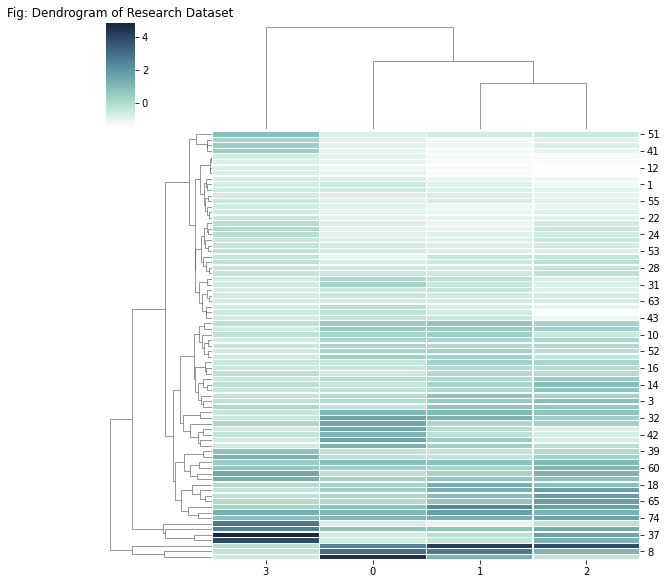

In [24]:
# Task 3: inspect the dendrogram 
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
sn.clustermap(scaled_sj_df, cmap=cmap, linewidths=.2,
figsize = (8,8) );
plt.title( "Fig: Dendrogram of Research Dataset");

In [25]:
# Task 4: size and avg. median household income of the largest cluster 
sj_df.groupby([sj_df.h_clusterid]).size()


#clusterid=3 is the largest

h_clusterid
0    13
1    27
2     3
3    34
dtype: int64

In [26]:
sj_df.groupby([sj_df.h_clusterid]).mean()
# avg. median household income for the largest cluster id =3 is 46295.588235

,25 or Over,Less than HS,HS,SC,Bachelor,Income
h_clusterid,,,,,,
0,46663.615385,5632.307692,7286.153846,8731.615385,25013.538462,56727.384615
1,24042.518519,6343.888889,7241.222222,6523.518519,3933.888889,41039.888889
2,49405.666667,18750.333333,15641.000000,10505.000000,4509.333333,36264.333333
3,10707.676471,1872.617647,2512.205882,2640.058824,3682.794118,46295.588235


# Part D

In [27]:
# read the data & drop the null values
cv_df = pd.read_csv('covid19.csv')
cv_df = cv_df.dropna()

In [28]:
# use a features matrix with relevant features
cv_features = ["Confirmed", "Deaths", "Recovered"]

cv_df[cv_features]

,Confirmed,Deaths,Recovered
0,35,0,0
1,299,18,0
2,731,11,0
3,796,23,0
4,8,0,0
...,...,...,...
3004,670,10,0
3005,18,0,0
3006,8,0,0
3007,11,0,0


In [29]:
# perform k-means clustering
# preprocessing: standardization / normalization
scaler = StandardScaler()
# Fit only on a features matrix
scaled_cv_df = scaler.fit_transform(
    cv_df[cv_features])
scaled_cv_df[0:5]

array([[-0.11787381, -0.07908524,  0.        ],
       [-0.05847749, -0.03585171,  0.        ],
       [ 0.03871648, -0.05266475,  0.        ],
       [ 0.05334057, -0.0238424 ,  0.        ],
       [-0.12394843, -0.07908524,  0.        ]])

In [30]:
# Make an instance of KMeans with 5 clusters
cv_kmeans = KMeans(n_clusters=5, random_state=1)

cv_kmeans.fit(scaled_cv_df)

# create cluster labels
labels = cv_kmeans.labels_
cv_df["labels"] = cv_kmeans.labels_
cv_df.head(3)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,labels
0,45001.0,Abbeville,South Carolina,US,26-05-2020 02:32,34.223334,-82.461707,35,0,0,35,"Abbeville, South Carolina, US",0
1,22001.0,Acadia,Louisiana,US,26-05-2020 02:32,30.295065,-92.414197,299,18,0,281,"Acadia, Louisiana, US",0
2,51001.0,Accomack,Virginia,US,26-05-2020 02:32,37.767072,-75.632346,731,11,0,720,"Accomack, Virginia, US",0


In [31]:
# find the largest clusters
cv_df.groupby([cv_df.labels]).size()

labels
0    2859
1       1
2      15
3       4
4      65
dtype: int64

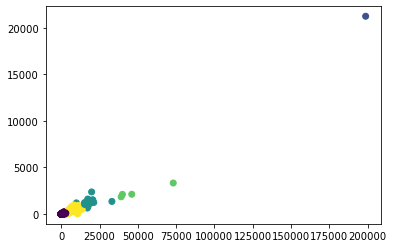

In [32]:
plt.scatter(cv_df['Confirmed'], cv_df['Deaths'], c=labels)

Summary: The three features used in the clustering analysis are skewed data so I have performed scaling to start with. The chart above used two of the three features used in the analysis to visualize. We can see there are outliers and apart from them, most of the information are clustered nearby. They are grouped by similar values of confirmed, recovered, death cases. The largest cluster has 2859 cities within it.  
